In [1]:
!pip install --upgrade imgaug

     -------------------------------------- 948.0/948.0 KB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 20.8 MB/s eta 0:00:00


You should consider upgrading via the 'c:\users\goode\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

import imgaug as ia
import imgaug.augmenters as iaa

In [3]:
ia.__version__

'0.4.0'

#### Imgaug

https://github.com/aleju/imgaug

In [4]:
ia.__version__

'0.4.0'

(60, 184, 3)

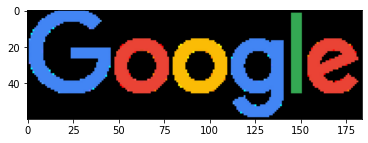

In [2]:
# Read image
img = io.imread('https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_92x30dp.png')[:, :, :3]
plt.imshow(img)
img.shape

### ImgAug

for more config: https://github.com/aleju/imgaug

In [3]:
# augmentation
seq = iaa.Sequential([
    iaa.Fliplr(0.5), # 50% horizontal flip
    iaa.Flipud(0.5), # 50% vertical flip
    iaa.Affine(
        rotate=(-30, 30), # random rotate -30 ~ +30 degree
        shear=(-16, 16), # random shear -16 ~ +16 degree
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)} # scale x, y: 80%~120%
    ),
    # Advanced
    iaa.AdditiveGaussianNoise(scale=(0, 0.2*255)),
    iaa.Cutout(nb_iterations=2),   
])

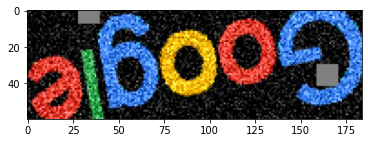

In [5]:
# Augment 1 image
img_aug = seq.augment_image(img)
plt.imshow(img_aug)

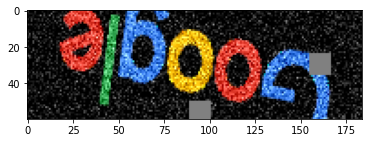

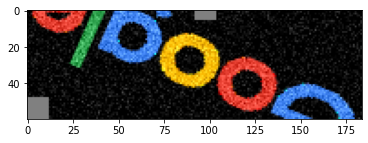

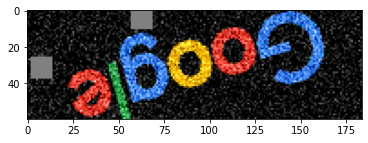

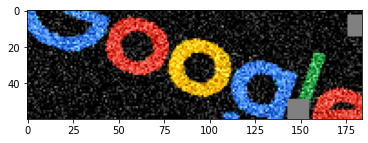

In [6]:
# Augment images (batch size = 4)
img_batch = np.stack([img]*4) # (4, 60, 184, 3)
img_aug_batch = seq.augment_images(img_batch)

for aug in img_aug_batch:
    plt.imshow(aug)
    plt.show()

#### tf.keras.preprocessing.image.ImageDataGenerator

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
from tensorflow import keras

num_classes = 10
BS = 128

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(16, 3, activation='relu'),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(num_classes, activation='softmax')
])

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train / 255.
x_test = x_test / 255.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])


datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
model.fit(datagen.flow(x_train, y_train, batch_size=BS),
          steps_per_epoch=len(x_train) // BS, 

          validation_data=(x_test, y_test),
          epochs=10)
